<div class="alert alert-block alert-info">    

# **Profiling**   
</div>

Group 47 

Rodrigo Silva 20230536 <br>
Nicolau Dulea 20230544 <br>
Joana Coelho Gonçalves - 20230977  

# Metadata

1. **_ID_** Unique identifier of the record
2. **_Age_** Age of the user at October 31st 2019 if it is not a dropout, or age of the user at date specified in attribute EnrollmentFinish if it is a dropout
3. _**Gender**_ Gender of the user (Male or Female)
4. _**Income** _Monthly salary of user
5. _**EnrollmentStart**_ Date of first enrollment
6. _**EnrollmentFinish**_ Finish date of last enrollment
7. _**LastPeriodStart**_ Start date of the last activity or the last two months if less
8. **_LastPeriodFinish_** End date of last activity or last two months if less
9. **_DateLastVisit_** Date and time of the user’s last visit to the sport facility
10. **_DaysWithoutFrequency_** Number of days the user did not visit the facilty before being considered a dropout
11. **_LifetimeValue_** Total amount paid by the customer during the period in which he was enrolled (between EnrollmentStart and EnrollmentFinish)
12. **_UseByTime_** Indicates whether the user was enrolled in this form of use (True if he was, False otherwise)
13. **_AthleticsActivities_** Indicates if the user was ever enrolled in athletics activities during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
14. **_WaterActivities_** 
15. **_FitnessActivities_** 
16. **_DanceActivities_** 
17. **_TeamActivities_** 
18. **_RacketActivities_** 
19. **_CombatActivities_** 
20. **_NatureActivities_** 
21. **_SpecialActivities_** Indicates if the user was enrolled in sports for disabled people during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
22. **_OtherActivities_** Indicates if the user was ever enrolled in other activities that does not fall into the other categories during the period between EnrollmentStart and EnrollmentFinish (True if it was, False otherwise)
23. **_NumberOfFrequencies_** Number of visits to the sports facility since the date indicated in EnrollmentStart and the date indicated in EnrollmentFinish
24. **_AttendedClasses_** Number of classes the user attended between EnrollmentStart and EnrollmentFinish
25. **_AllowedWeeklyVisitsBySLA_** Indicates the number of weekly visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish)
26. **_AllowedNumberOfVisitsBySLA_** Indicates the total number of visits that the user can make to the facilities according to the service he had hired in the last 2 months of his registration (between LastPeriodStart and LastPeriodFinish)
27. **_RealNumberOfVisits_** Indicates the actual number of visits that the user made to the facilities in the last period his registration (between LastPeriodStart and LastPeriodFinish)
28. **_NumberOfRenewals_** Number of renewals during the registration period (between EnrollmentStart and EnrollmentFinish)
29. **_HasReferences_** This field contains the value True if NumberOfReferences> 0, or False otherwise
30. **_NumberOfReferences_** Number of people with which the user is related by family relationship or friendship
31. **_Dropout_** Represents the user’s enrollment status, assuming the value True if he is quitting or False if he is not

### Imports

In [3]:
#!pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 9.5 MB/s eta 0:00:00:00:0100:01


In [4]:
# Working with data
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from collections import Counter

# Tools for visualization
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.manifold import TSNE
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
#pip install pandas plotly
import plotly.graph_objects as go
import plotly.express as px

# Classification of outliers
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the 3 datasets

df_kids = pd.read_csv('kids_preprocessing.csv', index_col='ID')
df_adults = pd.read_csv('adults_preprocessing.csv', index_col='ID')
df_elders = pd.read_csv('elders_preprocessing.csv', index_col='ID')

In [6]:
df_kids.head()

,Age,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,RacketActivities,...,Dropout,Recency,EnrollmentTime,AverageSpent,HasRenewals,ServiceVisitsRatio,AttendedClassesPerVisit,EnrollmentTimeByRenewal,Male,labels
ID,,,,,,,,,,,,,,,,,,,,,
10003,9.0,22.0,155.40,0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,283.0,160.0,7.770000,0,0.169300,1.000000e-01,160.000000,True,0
10009,14.0,74.0,253.50,0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,1076.0,209.0,42.250000,1,0.000000,1.000000e+00,209.000000,False,0
10013,12.0,262.0,188.60,0,1.0,0.0,0.0,0.0,0.0,0.0,...,1,719.0,302.0,188.600000,0,0.000000,2.220446e-16,302.000000,False,0
10025,13.0,5.0,596.30,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,5.0,1513.0,22.085185,1,0.477707,6.666667e-01,504.333333,False,2
10031,2.0,107.0,492.85,0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1195.0,415.0,28.991176,1,0.000000,1.000000e+00,415.000000,True,0


In [7]:
df_adults.head()

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,...,Dropout,Recency,EnrollmentTime,AverageSpent,HasRenewals,ServiceVisitsRatio,AttendedClassesPerVisit,EnrollmentTimeByRenewal,Male,labels
ID,,,,,,,,,,,,,,,,,,,,,
10000,60.0,5500.0,1.0,89.35,0,0.0,0.0,1.0,0.0,0.0,...,0,1.0,58.0,9.927778,0,0.318471,0.777778,58.000000,False,2
10001,29.0,2630.0,60.0,479.20,0,0.0,0.0,0.0,0.0,0.0,...,1,1568.0,398.0,20.834783,1,0.057405,0.043478,199.000000,False,0
10002,23.0,1980.0,7.0,37.60,0,0.0,0.0,1.0,0.0,0.0,...,1,889.0,30.0,6.266667,0,0.199800,0.000000,30.000000,True,1
10004,35.0,4320.0,210.0,373.20,0,0.0,0.0,1.0,0.0,0.0,...,1,721.0,778.0,9.102439,1,0.000000,0.000000,259.333333,True,0
10005,24.0,2220.0,3.0,140.00,0,0.0,0.0,1.0,0.0,0.0,...,1,1190.0,243.0,5.000000,0,0.440603,0.000000,243.000000,False,0


In [8]:
df_elders.head()

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,...,Dropout,Recency,EnrollmentTime,AverageSpent,HasRenewals,ServiceVisitsRatio,AttendedClassesPerVisit,EnrollmentTimeByRenewal,Male,labels
ID,,,,,,,,,,,,,,,,,,,,,
10034,73.999927,5210.0,20.0,38.50,0,0.0,0.0,1.0,0.0,0.0,...,0,20,30.0,9.625000,0,0.133200,0.000000,30.000000,False,7
10095,82.999555,5080.0,1.0,692.20,0,0.0,0.0,0.0,0.0,0.0,...,0,1,1025.0,2.378694,1,0.779529,0.000000,341.666667,True,7
10175,68.999977,5780.0,88.0,166.60,0,0.0,0.0,1.0,0.0,0.0,...,1,1428,146.0,11.900000,0,0.000000,0.000000,146.000000,False,7
10217,68.999977,4120.0,42.0,970.60,0,0.0,0.0,1.0,0.0,0.0,...,1,93,978.0,2.534204,1,0.161238,0.000000,326.000000,False,7
10233,71.999813,5590.0,14.0,1221.76,0,0.0,1.0,1.0,0.0,0.0,...,0,14,1648.0,7.360000,1,0.117578,0.006024,329.600000,False,7


In [9]:
# Change labels

df_kids['labels'] = df_kids['labels'].map({0:'Kids_1', 1:'Kids_2', 2:'Kids_3'})
df_adults['labels'] = df_adults['labels'].map({0:'Adults_1', 1:'Adults_2', 2:'Adults_3'})
df_elders['labels'] = 'Seniors'

In [10]:
# df_kids was missing the feature Income. Since they aren't allowed to work, their income will be 0. 

df_kids['Income'] = 0

<div class="alert alert-block alert-info">    

## Profiling  
</div>

<div class="alert alert-block alert-success">
    
## General view for kids and adults

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=14.399999999999999.
findfont: score(FontEntry(fname='/Users/rodrigo/anaconda3/envs/dm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/Users/rodrigo/anaconda3/envs/dm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/rodrigo/anaconda3/envs/dm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.2.
findfont: score(FontEntry(fname='/Users/rodrigo/anaconda3/envs/dm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/Users/rodrigo/anaconda3/envs/dm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/rodrigo/anaconda3/envs/dm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/rodrigo/anaconda3/envs/dm/lib/python3.11/site-packages/matplotlib/mpl-d

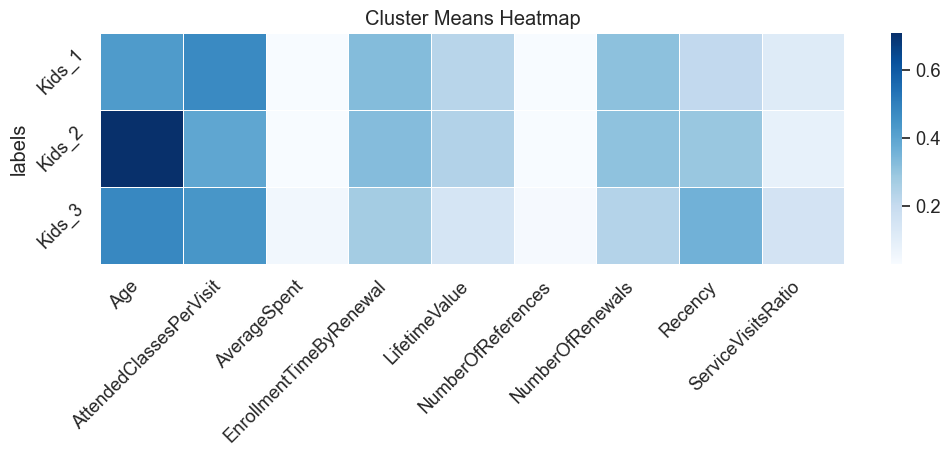

In [11]:
numerical_columns = df_kids.select_dtypes(include=['float64', 'int64']).columns

# Removing the 'labels' column from the list of columns to scale
numerical_columns_to_scale = [col for col in numerical_columns if col != 'labels']

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Scaling the selected columns
df_kids_scaled = df_kids.copy()  # Create a copy to keep the original DataFrame
df_kids_scaled[numerical_columns_to_scale] = scaler.fit_transform(df_kids[numerical_columns_to_scale])

# Creating a pivot table for heatmap
heatmap_data = df_kids_scaled.pivot_table(index='labels', values=['Age', 'LifetimeValue', 'NumberOfRenewals', 'NumberOfReferences', 'Recency',
              'AverageSpent', 'ServiceVisitsRatio', 'AttendedClassesPerVisit', 'EnrollmentTimeByRenewal'], aggfunc='mean')

# Creating the heatmap with rotated x-axis tick labels
plt.figure(figsize=(12, 3))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
heatmap = sns.heatmap(heatmap_data, annot=False, cmap='Blues', fmt=".2f", linewidths=0.5)

# Rotating x-axis tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45, ha='right')

plt.title('Cluster Means Heatmap')
plt.show()

locator: <matplotlib.ticker.AutoLocator object at 0x161fde4d0>


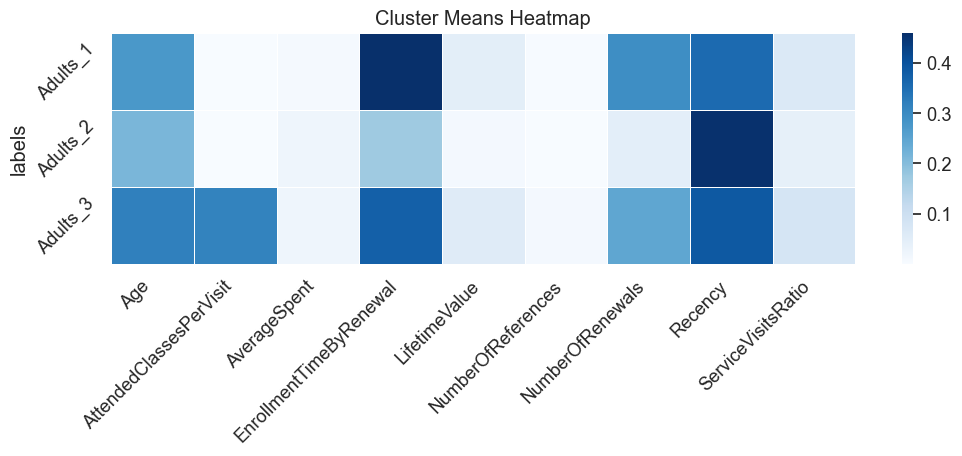

In [12]:
# Selecting numerical columns for scaling
numerical_columns = df_adults.select_dtypes(include=['float64', 'int64']).columns

# Removing the 'labels' column from the list of columns to scale
numerical_columns_to_scale = [col for col in numerical_columns if col != 'labels']

# Creating a MinMaxScaler instance
scaler = MinMaxScaler()

# Scaling the selected columns
df_adults_scaled = df_adults.copy()  # Create a copy to keep the original DataFrame
df_adults_scaled[numerical_columns_to_scale] = scaler.fit_transform(df_adults[numerical_columns_to_scale])

# Creating a pivot table for heatmap
heatmap_data = df_adults_scaled.pivot_table(index='labels', values=['Age', 'LifetimeValue', 'NumberOfRenewals', 'NumberOfReferences', 'Recency',
              'AverageSpent', 'ServiceVisitsRatio', 'AttendedClassesPerVisit', 'EnrollmentTimeByRenewal'], aggfunc='mean')

# Creating the heatmap with rotated x-axis tick labels
plt.figure(figsize=(12, 3))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
heatmap = sns.heatmap(heatmap_data, annot=False, cmap='Blues', fmt=".2f", linewidths=0.5)

# Rotating x-axis tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45, ha='right')

plt.title('Cluster Means Heatmap')
plt.show()

<div class="alert alert-block alert-success">

## Perspective on the whole dataset

In [13]:
# join the 3 datasets

df = pd.concat([df_elders, df_adults, df_kids], axis=0)

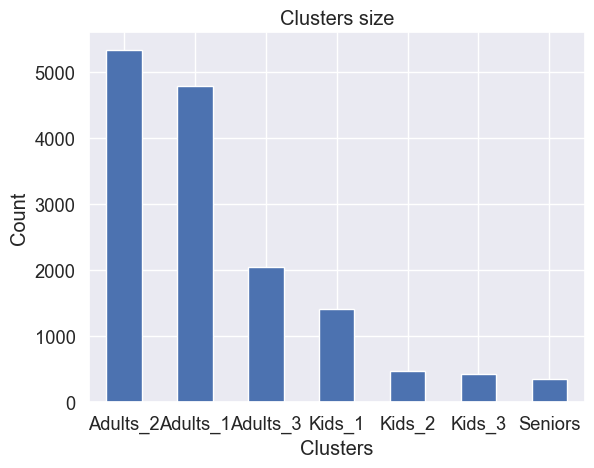

In [14]:
# visualize size of clusters

# Count the occurrences of each unique value in the column
value_counts = df['labels'].value_counts()

# Plot a bar chart
ax = value_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Clusters size')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
# Show the plot
plt.show()

In [15]:
# Means for the different clusters

display((df.groupby('labels').mean().T).style.format(precision=2).background_gradient(axis=1))

labels,Adults_1,Adults_2,Adults_3,Kids_1,Kids_2,Kids_3,Seniors
Age,29.22,26.20,31.34,6.40,10.62,7.18,71.05
Income,2601.45,2292.86,2749.64,0.00,0.00,0.00,5526.52
DaysWithoutFrequency,87.76,69.38,84.69,59.09,72.78,95.51,75.27
LifetimeValue,345.12,89.96,402.66,636.12,667.62,424.51,417.66
UseByTime,0.10,0.02,0.04,0.00,0.01,0.00,0.03
AthleticsActivities,0.01,0.01,0.00,0.01,0.00,0.01,0.01
WaterActivities,0.17,0.12,0.49,0.91,0.65,0.64,0.20
FitnessActivities,0.77,0.76,0.28,0.00,0.03,0.00,0.66
DanceActivities,0.00,0.00,0.00,0.00,0.00,0.00,0.00
TeamActivities,0.02,0.01,0.19,0.09,0.21,0.17,0.00


In [16]:
# Define sets of features to analyse

metric_features = ['Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue', 'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA', 
                   'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals', 'NumberOfReferences', "Recency", "EnrollmentTime", 
                   "AverageSpent", "ServiceVisitsRatio", "AttendedClassesPerVisit", "EnrollmentTimeByRenewal"]

non_metric_features = ['Gender', 'UseByTime', 'HasReferences', 'HasRenewals', 'Dropout', 'AthleticsActivities','WaterActivities', 'FitnessActivities', 'RacketActivities', 
                       'CombatActivities','SpecialActivities', 'TeamActivities', 'DanceActivities', 'NatureActivities', 'OtherActivities']

activities = ['AthleticsActivities','WaterActivities', 'FitnessActivities', 'RacketActivities', 'CombatActivities',
              'SpecialActivities', 'TeamActivities', 'DanceActivities', 'NatureActivities', 'OtherActivities']

feats_adults = ['Age',"LifetimeValue","NumberOfRenewals",'NumberOfReferences', 'Recency',
              'AverageSpent',"ServiceVisitsRatio", 'AttendedClassesPerVisit',"EnrollmentTimeByRenewal"]

feats_kids = ['Age',"LifetimeValue","AllowedNumberOfVisitsBySLA","NumberOfRenewals",'NumberOfReferences', 'Recency','AverageSpent',
              "ServiceVisitsRatio", 'AttendedClassesPerVisit',"EnrollmentTimeByRenewal"]

# Kids -  Age,lifetimevalue, recency,  water activities, #frequencies, attended classes 

# Adultos - lifetimevalue, income, #frequencies, recency, dropout, enrollmenttimebyrenewal

<div class="alert alert-block alert-success">

### Metric features

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='/Users/rodrigo/anaconda3/envs/dm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/Users/rodrigo/anaconda3/envs/dm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/rodrigo/anaconda3/envs/dm/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/Users/rodrigo/anaconda3/envs/dm/lib/python3.11/site-packages/matplotlib/mpl-d

findfont: score(FontEntry(fname='/System/Library/Fonts/NotoSansMyanmar.ttc', name='Noto Sans Myanmar', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 10.525
findfont: score(FontEntry(fname='/System/Library/Fonts/Times.ttc', name='Times', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansUgaritic-Regular.ttf', name='Noto Sans Ugaritic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Verdana.ttf', name='Verdana', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/NotoSansTirhuta-Regular.ttf', name='Noto Sans Tirhuta', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(F

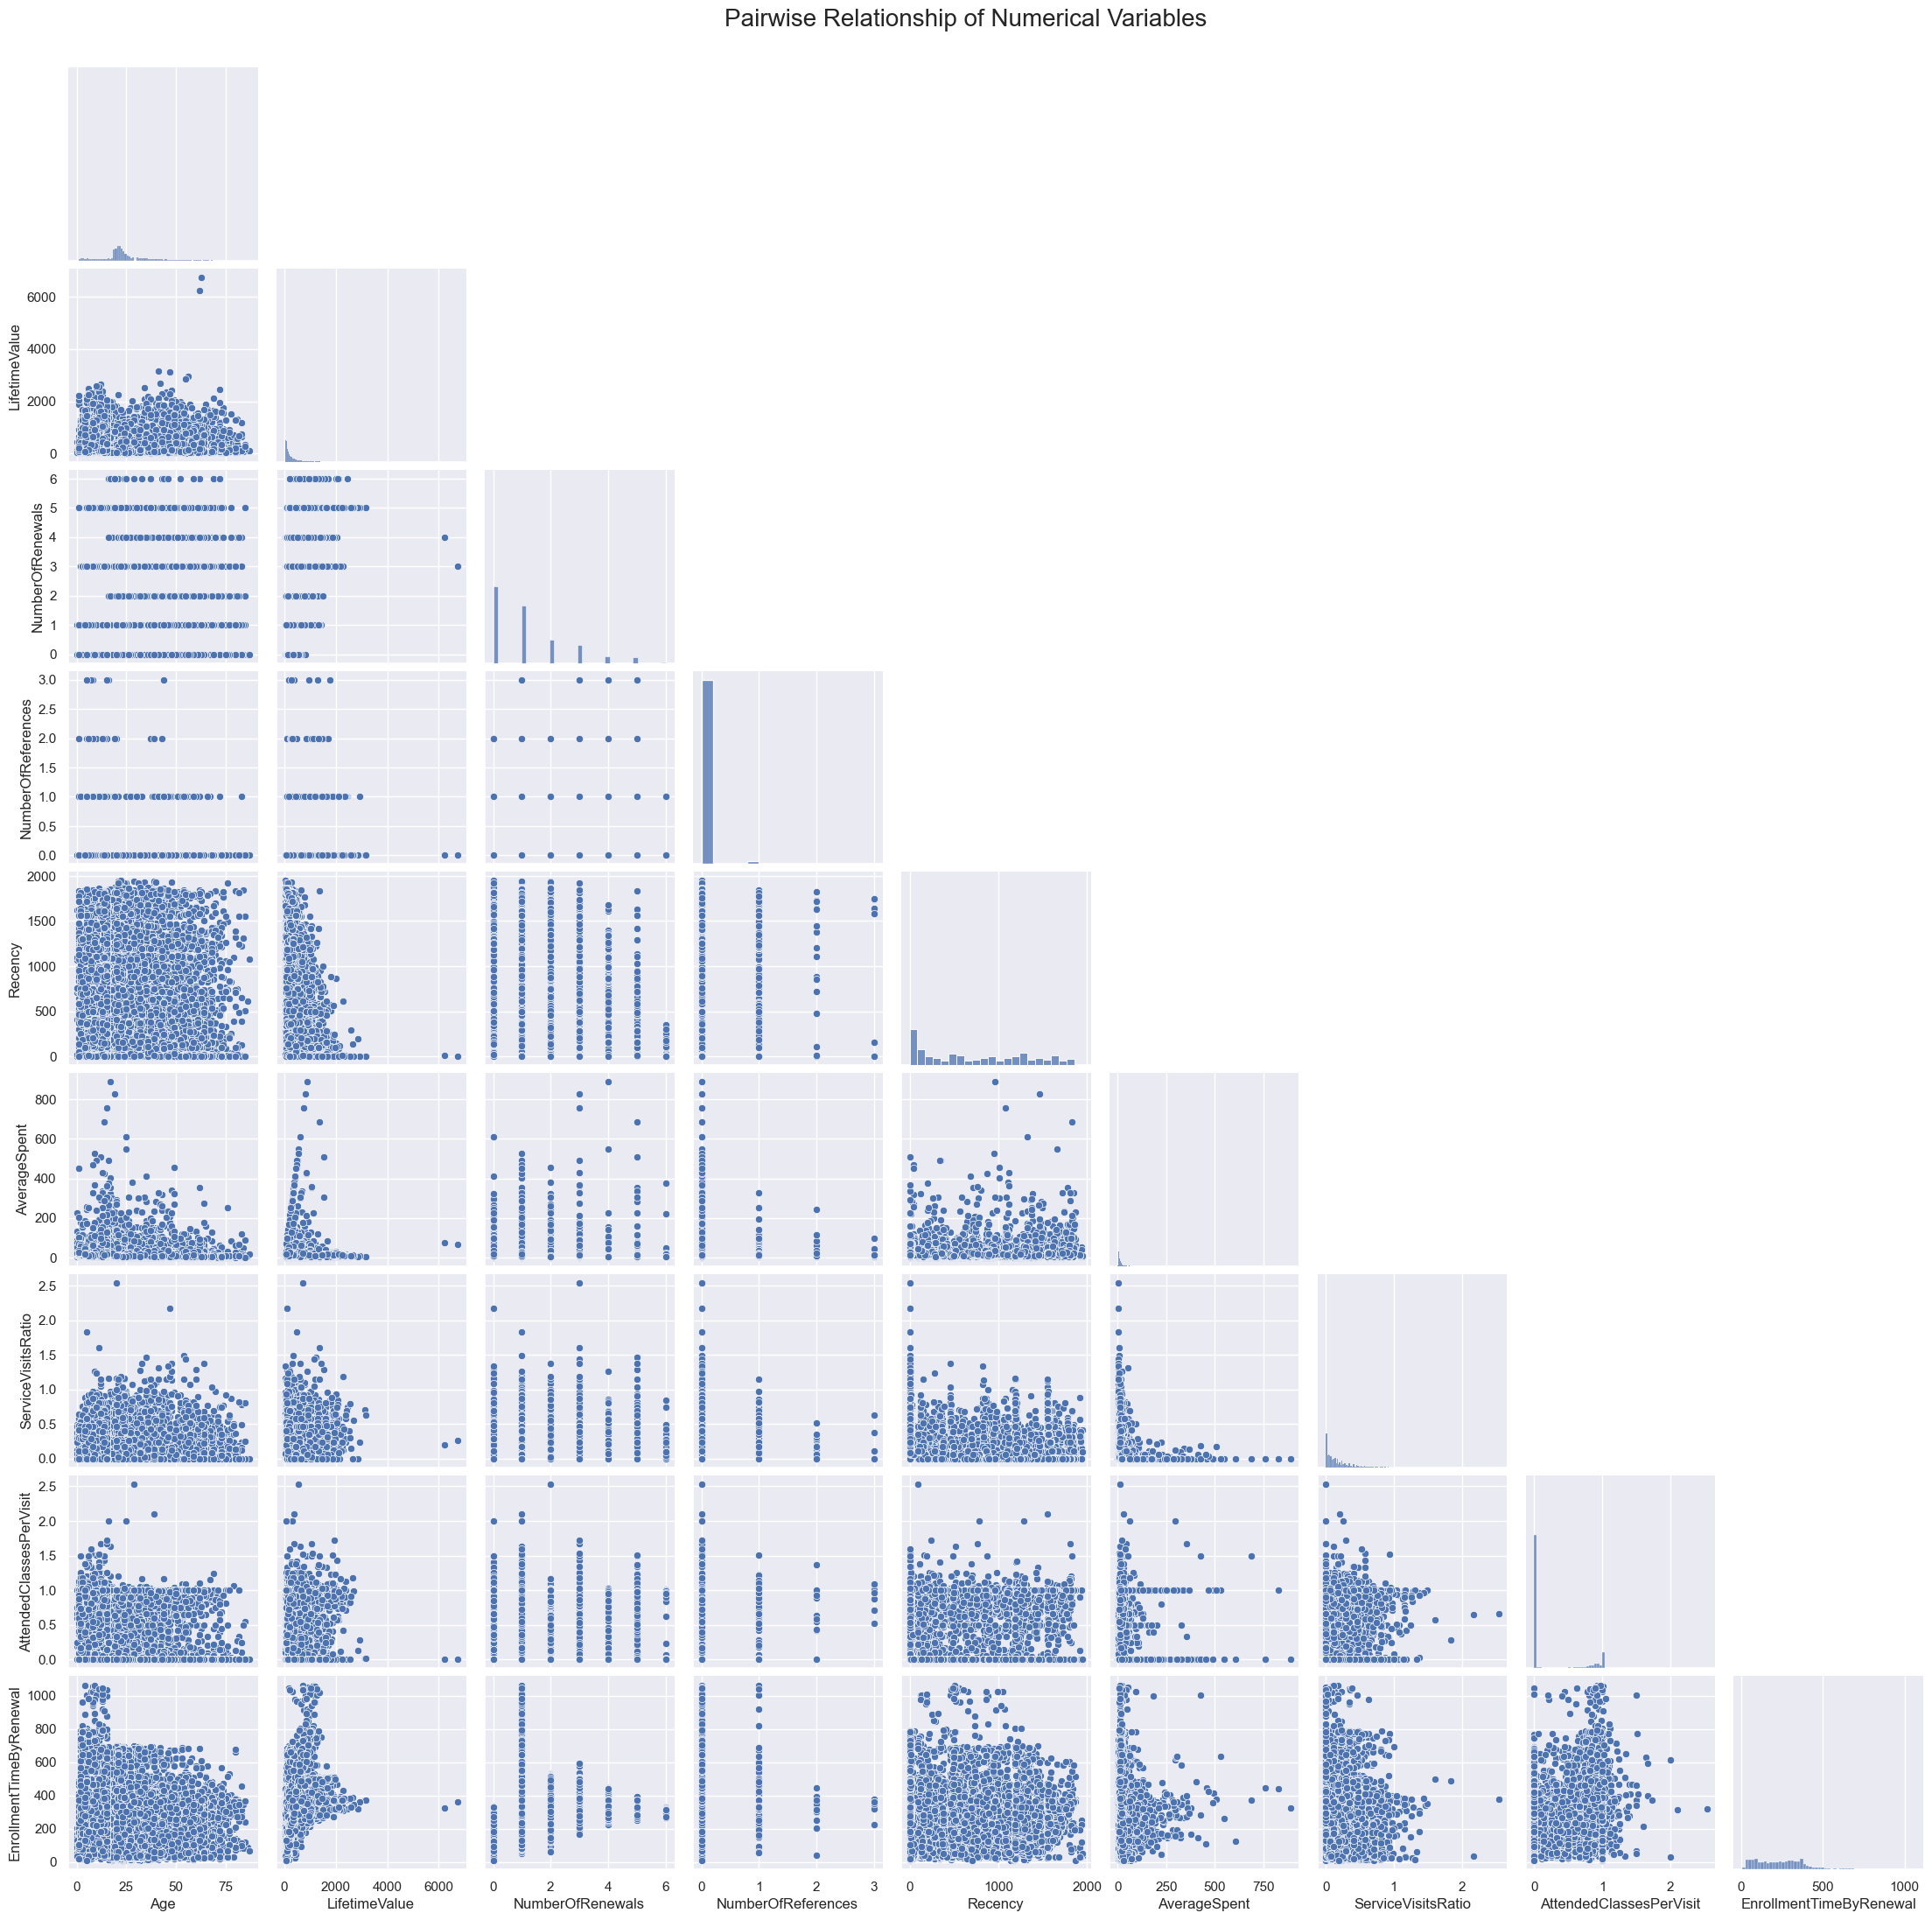

In [17]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[feats_adults], diag_kind="hist", corner=True)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

In [18]:
df['Group'] = df['labels'].map({
    'Kids_1':'Kids', 
    'Kids_2':'Kids', 
    'Kids_3':'Kids', 
    'Adults_1':'Adults', 
    'Adults_2':'Adults', 
    'Adults_3':'Adults', 
    'Seniors':'Seniors'})

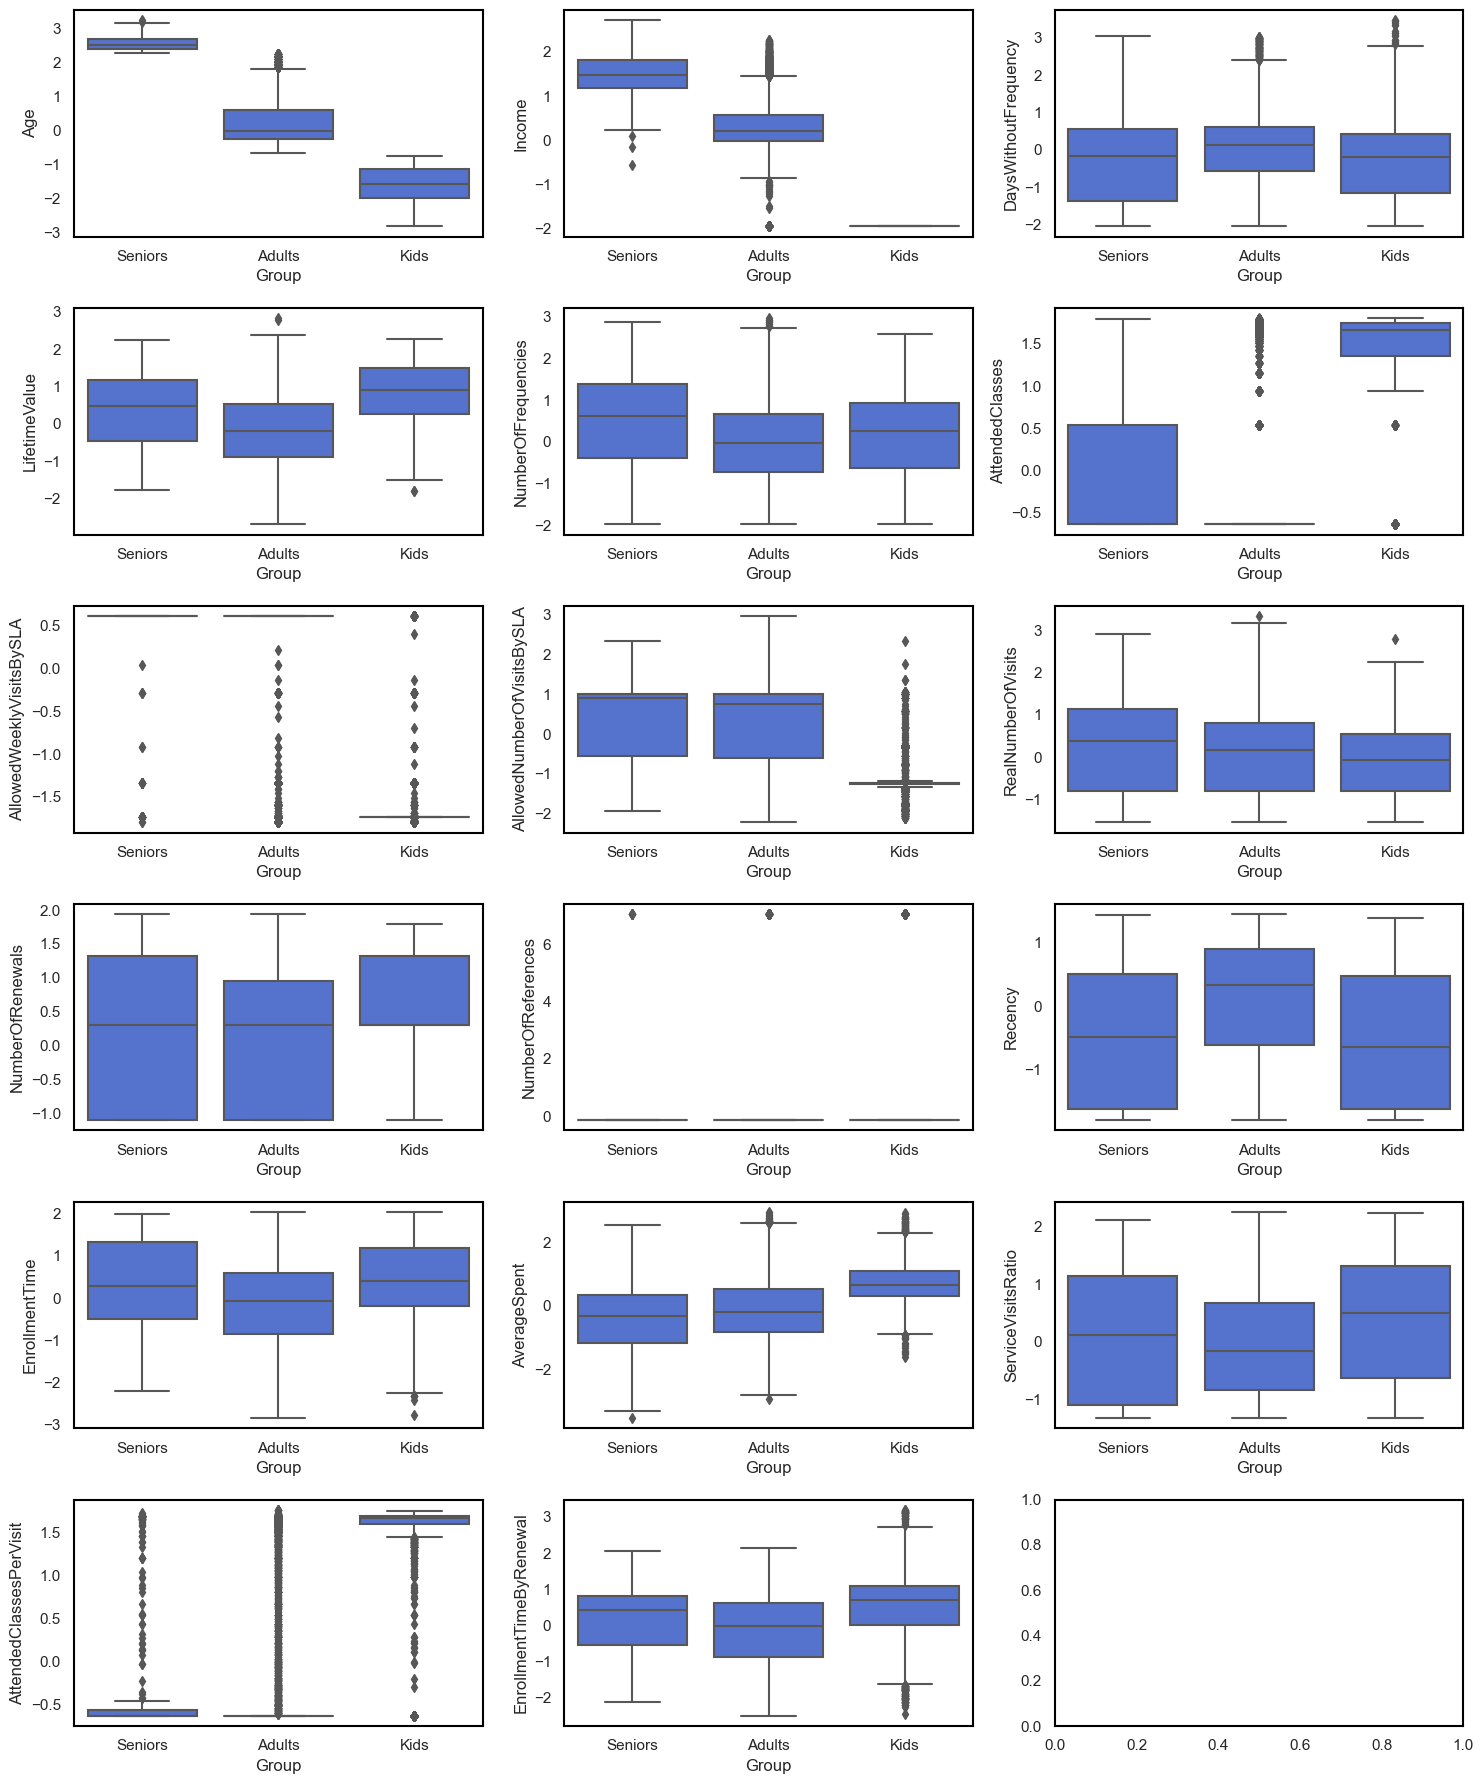

In [19]:
# Side by side comparison of metric features' boxplots for the 3 age groups

df_copy = df.copy()

pt = PowerTransformer()
df_copy[metric_features] = pt.fit_transform(df_copy[metric_features])


# Adjust the number of columns to have 6 subplots per line
num_subplots_per_line = 3
num_features = len(metric_features)
num_lines = -(-num_features // num_subplots_per_line)  # Calculate the number of lines needed

fig, axes = plt.subplots(nrows=num_lines, ncols=num_subplots_per_line, figsize=(15, 3 * num_lines))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 

for i, feature in enumerate(metric_features):
    ax = axes[i // num_subplots_per_line, i % num_subplots_per_line]  # Calculate subplot position
    sns.boxplot(x='Group', y=feature, data=df_copy, ax=ax, color='royalblue')


# Adjust layout
plt.tight_layout()
plt.show()

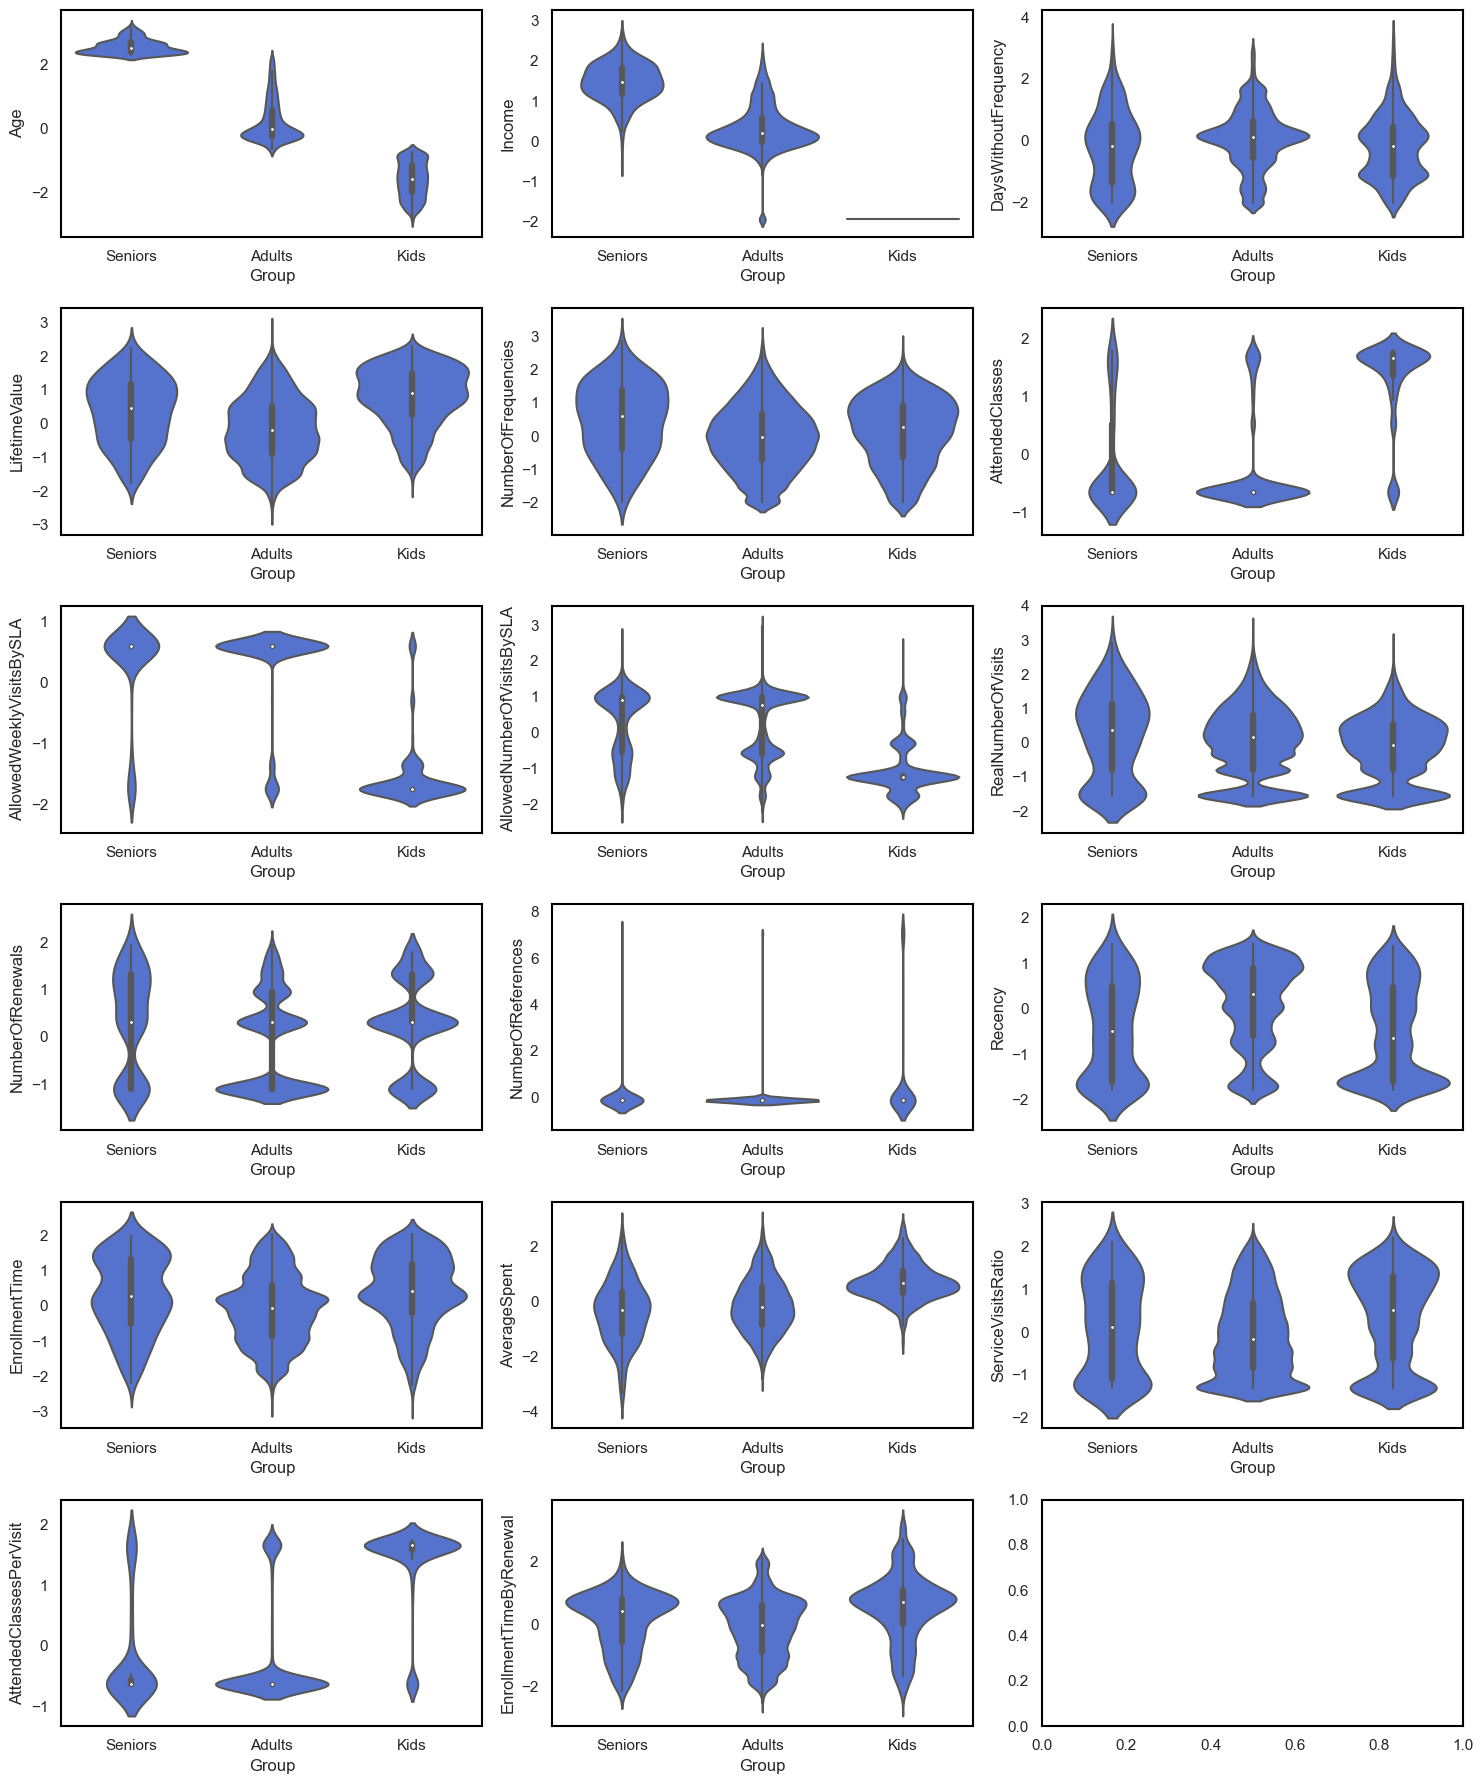

In [20]:
# Metric features' Violin plots for the 3 age groups

fig, axes = plt.subplots(nrows=num_lines, ncols=num_subplots_per_line, figsize=(15, 3 * num_lines))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5) 

for i, feature in enumerate(metric_features):
    ax = axes[i // num_subplots_per_line, i % num_subplots_per_line]  # Calculate subplot position
    sns.violinplot(x='Group', y=feature, data=df_copy, ax=ax, color='royalblue')

# Adjust layout
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### Activities features

In [21]:
df_activities = (df[activities].groupby(df['labels']).apply(sum)).T

data = {
    'labels': ['AthleticsActivities', 'WaterActivities', 'FitnessActivities', 'RacketActivities', 
               'CombatActivities', 'SpecialActivities', 'TeamActivities', 'DanceActivities', 
               'NatureActivities', 'OtherActivities'],
    'Adults_1': [38.0, 815.0, 3716.0, 3.0, 627.0, 168.0, 93.0, 0.0, 0.0, 2.0],
    'Adults_2': [45.0, 627.0, 4050.0, 13.0, 721.0, 20.0, 56.0, 0.0, 0.0, 3.0],
    'Adults_3': [1.0, 1004.0, 565.0, 265.0, 59.0, 115.0, 378.0, 0.0, 0.0, 23.0],
    'Kids_1': [16.0, 1294.0, 2.0, 28.0, 25.0, 2.0, 125.0, 0.0, 0.0, 0.0],
    'Kids_2': [2.0, 303.0, 13.0, 2.0, 84.0, 0.0, 97.0, 0.0, 0.0, 0.0],
    'Kids_3': [3.0, 272.0, 0.0, 35.0, 69.0, 5.0, 71.0, 0.0, 0.0, 0.0],
    'Seniors': [3.0, 70.0, 226.0, 1.0, 2.0, 82.0, 0.0, 0.0, 0.0, 0.0]
}

df_tree = pd.DataFrame(data)

# Melt the DataFrame to long format
df_long = pd.melt(df_tree, id_vars=['labels'], var_name='Group', value_name='Value')

# Create TreeMap chart using plotly.express
fig = px.treemap(df_long, path=['labels', 'Group'], values='Value', height=900, width=1100, color_discrete_sequence=['#084594', '#2171b5', '#4292c6', '#6baed6', '#9ecae1', '#c6dbef', '#deebf7', '#f7fbff'])

# Show the plot
fig.show()


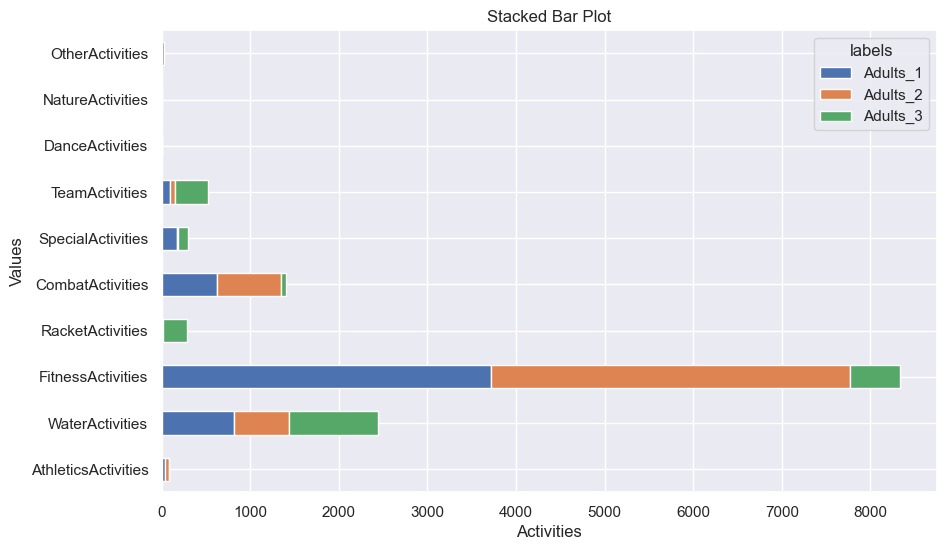

In [22]:
# Plot a stacked bar plot for adults
ax = df_activities.iloc[:, 0:3].plot(kind='barh', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Activities')
plt.ylabel('Values')
plt.title('Stacked Bar Plot')

# Show the plot
plt.show()


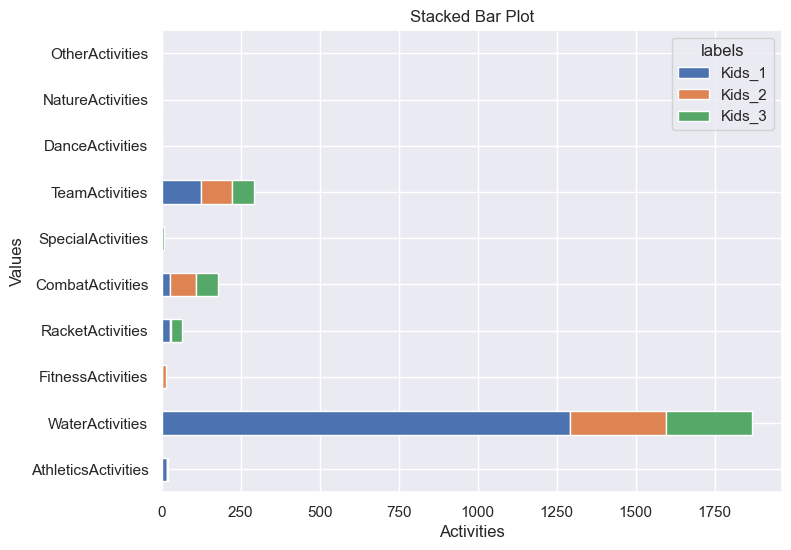

In [23]:
# Plot a stacked bar plot for kids
ax = df_activities.iloc[:, 3:6].plot(kind='barh', stacked=True, figsize=(8, 6))

# Add labels and title
plt.xlabel('Activities')
plt.ylabel('Values')
plt.title('Stacked Bar Plot')

# Show the plot
plt.show()

<div class="alert alert-block alert-info"> 

## Reclassify outliers

In [24]:
# read the whole dataset
df_out = pd.read_csv('XYZ_sports_dataset.csv', sep=';', index_col = 'ID')
print(df_out.shape)

# Keep the instances that weren't used on the other datasets (left excluding join)
df_out = df_out[~df_out.index.isin(df.index)]
print(df_out.shape)

(14942, 30)
(122, 30)


In [25]:
df_out.head()

,Age,Gender,Income,EnrollmentStart,EnrollmentFinish,LastPeriodStart,LastPeriodFinish,DateLastVisit,DaysWithoutFrequency,LifetimeValue,...,OtherActivities,NumberOfFrequencies,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout
ID,,,,,,,,,,,,,,,,,,,,,
10111,24,Male,2250.0,2015-04-30,2015-04-30,2015-01-01,2015-06-30,2015-05-12,1633,33.6,...,0.0,2.0,0,7.0,28.98,2,5,0.0,0,0
10161,27,Female,2020.0,2014-09-12,2019-03-14,2014-07-01,2015-06-30,2014-10-23,1603,109.7,...,0.0,10.0,7,2.0,17.72,0,4,0.0,0,1
10228,38,Female,3960.0,2015-03-27,2018-11-11,2018-07-01,2018-12-31,2015-04-18,1303,98.5,...,0.0,9.0,0,7.0,31.99,0,4,0.0,0,1
10475,34,Male,2150.0,2018-03-12,2018-03-12,2019-07-01,2019-12-31,2019-10-23,8,18.4,...,0.0,81.0,0,7.0,10.01,2,2,0.0,0,0
10734,44,Male,3890.0,2018-06-02,2019-10-31,2019-07-01,2019-12-31,2019-10-25,6,10.6,...,0.0,38.0,0,7.0,52.01,7,2,0.0,0,1


In [26]:
# Update columns so they match the ones in df
df_out.drop(columns=['EnrollmentStart', 'EnrollmentFinish', 'LastPeriodStart', 'LastPeriodFinish', 'DateLastVisit'], inplace=True)

df_encoded = pd.get_dummies(df_out, columns=["Gender"], drop_first=True)
df_encoded.rename(columns={'Gender_Male': 'Male'}, inplace=True)
df_out = df_encoded

<div class="alert alert-block alert-success">

### Train a Decision Tree Classifier

In [27]:
# Preparing the data: remove columns that don't exist in df_out
df_tree = df.drop(columns=["Recency", "EnrollmentTime", "AverageSpent", "ServiceVisitsRatio", "AttendedClassesPerVisit", 
                           "EnrollmentTimeByRenewal", 'HasRenewals', 'Group']).copy()

df_tree['labels'] = df_tree['labels'].map({'Kids_1':1, 'Kids_2':2, 'Kids_3':3, 'Adults_1':4, 'Adults_2':5, 'Adults_3':6, 'Seniors':7})

X = df_tree.drop(columns='labels')
y = df_tree['labels']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 94.67% of the customers correctly


In [28]:
df_out['predicted_labels'] = dt.predict(df_out)
df_out.head()

,Age,Income,DaysWithoutFrequency,LifetimeValue,UseByTime,AthleticsActivities,WaterActivities,FitnessActivities,DanceActivities,TeamActivities,...,AttendedClasses,AllowedWeeklyVisitsBySLA,AllowedNumberOfVisitsBySLA,RealNumberOfVisits,NumberOfRenewals,HasReferences,NumberOfReferences,Dropout,Male,predicted_labels
ID,,,,,,,,,,,,,,,,,,,,,
10111,24,2250.0,1633,33.6,0,0.0,0.0,1.0,0.0,0.0,...,0,7.0,28.98,2,5,0.0,0,0,True,5
10161,27,2020.0,1603,109.7,0,0.0,1.0,0.0,0.0,0.0,...,7,2.0,17.72,0,4,0.0,0,1,False,6
10228,38,3960.0,1303,98.5,0,0.0,0.0,1.0,0.0,0.0,...,0,7.0,31.99,0,4,0.0,0,1,False,4
10475,34,2150.0,8,18.4,0,0.0,0.0,0.0,0.0,0.0,...,0,7.0,10.01,2,2,0.0,0,0,True,4
10734,44,3890.0,6,10.6,1,0.0,0.0,1.0,0.0,0.0,...,0,7.0,52.01,7,2,0.0,0,1,True,4


In [29]:
Counter(df_out['predicted_labels'])

Counter({4: 46, 5: 34, 3: 18, 6: 14, 2: 6, 1: 4})